In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [74]:
df=pd.read_csv("Final_Movie_Dataset.csv")
df.head()

,Unnamed: 0,name,year,duration,genre,rating,description,director,stars
0,0,Daniel the Wizard,2004,1h 21min,Comedy Crime Fantasy,1.2,"Evil assassins want to kill Daniel Kublbock, t...",Ulli Lommel,Daniel Küblböck Ulli Lommel Rudolf Waldemar Brem
1,1,Smolensk,2016,2h,Drama Thriller,1.2,An inspired story of people affected by the 20...,Antoni Krauze,Beata Fido Maciej Póltorak Aldona Struzik
2,2,Foodfight!,2012,1h 31min,Animation Action Adventure,1.3,The evil Brand X joins a supermarket that beco...,Lawrence Kasanoff,Hilary Duff Haylie Duff Charlie Sheen
3,3,Saving Christmas,2014,1h 19min,Comedy Family,1.3,His annual Christmas party faltering thanks to...,Darren Doane,Kirk Cameron Darren Doane Bridgette Cameron
4,4,Superbabies: Baby Geniuses 2,2004,1h 28min,Comedy Family Sci-Fi,1.5,A group of smart-talking toddlers find themsel...,Bob Clark,Jon Voight Scott Baio Vanessa Angel


In [75]:
df.isnull().sum()

Unnamed: 0     0
name           0
year           0
duration       0
genre          0
rating         0
description    0
director       0
stars          0
dtype: int64

In [76]:
df.duplicated().sum()

np.int64(0)

### so we have zero null and duplicate values.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1500 non-null   int64  
 1   name         1500 non-null   object 
 2   year         1500 non-null   int64  
 3   duration     1500 non-null   object 
 4   genre        1500 non-null   object 
 5   rating       1500 non-null   float64
 6   description  1500 non-null   object 
 7   director     1500 non-null   object 
 8   stars        1500 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 105.6+ KB


removing Unnamed: 0, description and Stars column

In [78]:
df.drop(columns=["Unnamed: 0","description","stars"],inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1500 non-null   object 
 1   year      1500 non-null   int64  
 2   duration  1500 non-null   object 
 3   genre     1500 non-null   object 
 4   rating    1500 non-null   float64
 5   director  1500 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 70.4+ KB


converting year, duration into numeric and also duration into minutes

In [80]:
df['year'] = df["year"].astype(int)

In [81]:
df.sample(5)

,name,year,duration,genre,rating,director
1382,Batman Begins,2005,2h 20min,Action Crime Drama,8.2,Christopher Nolan
445,The Magdalene Sisters,2002,1h 54min,Drama,7.7,Peter Mullan
778,Casino Royale,2006,2h 24min,Action Adventure Thriller,8.0,Martin Campbell
812,Sling Blade,1996,2h 15min,Drama,8.0,Billy Bob Thornton
266,Gone Baby Gone,2007,1h 54min,Crime Drama Mystery,7.6,Ben Affleck


In [82]:
def parse_duration(s):
    hours = 0
    minutes = 0
    match = re.findall(r'(\d+)\s*(h|min)', s)
    for value, unit in match:
        if unit == 'h':
            hours = int(value)
        elif unit == 'min':
            minutes = int(value)
    return hours*60+minutes

df["duration_in_minutes"] = df['duration'].apply(parse_duration)

In [83]:
df.drop(columns=["duration"],inplace=True)

In [84]:
df.sample(5)

,name,year,genre,rating,director,duration_in_minutes
916,Blade Runner,1982,Action Drama Sci-Fi,8.1,Damián Szifron,117
13,Disaster Movie,2008,Comedy Sci-Fi,1.9,Jason Friedberg,87
593,Bride of Frankenstein,1935,Drama Horror Sci-Fi,7.8,James Whale,75
1492,Mr. Smith Goes to Washington,1939,Comedy Drama,8.1,Frank Capra,129
1091,The Treasure of the Sierra Madre,1948,Adventure Drama Western,8.2,John Huston,126


In [85]:
df.isnull().sum()

name                   0
year                   0
genre                  0
rating                 0
director               0
duration_in_minutes    0
dtype: int64

In [86]:
from sklearn.preprocessing import MultiLabelBinarizer
df['genre_list'] = df['genre'].str.split()

mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['genre_list']), columns=mlb.classes_)
df_final = pd.concat([df, genre_encoded], axis=1)

In [87]:
df_final.drop(columns=["genre","genre_list"],inplace=True)

In [88]:
df_final.sample(5)

,name,year,rating,director,duration_in_minutes,Action,Adventure,Animation,Biography,Comedy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
485,The Irishman,2019,7.8,Christopher Nolan,209,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
34,Adipurush,2023,2.6,Om Raut,179,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1406,Citizen Kane,1941,8.2,Orson Welles,119,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
999,The Twilight Samurai,2002,8.1,Yôji Yamada,129,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1236,Inception,2010,8.8,Christopher Nolan,148,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
df_final.drop(columns=["name"],inplace=True)

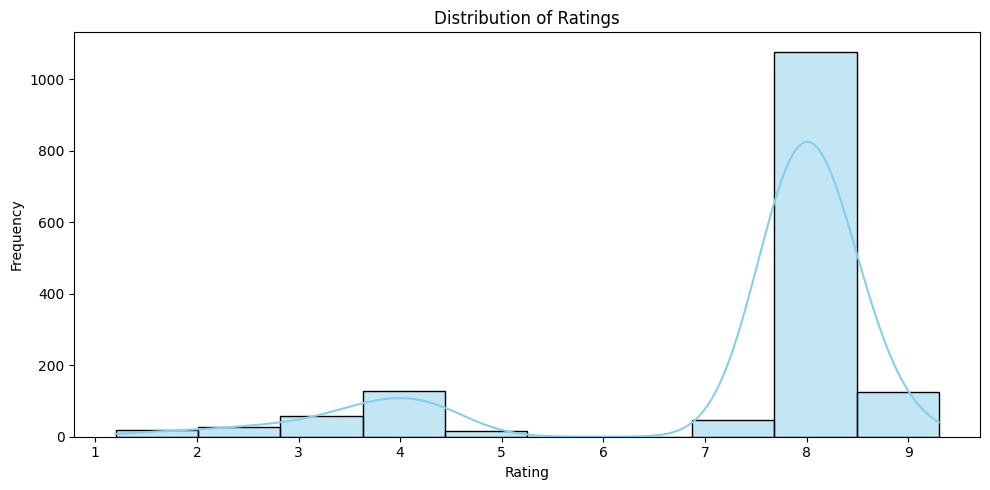

In [90]:
plt.figure(figsize=(10, 5))
sns.histplot(df_final['rating'], bins=10, kde=True, color='skyblue')

plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [91]:
df_final['rating_label'] = np.where(df_final['rating'] <= 4.5, 'Worst',
                       np.where(df_final['rating'] <= 8.1, 'Average',
                       np.where(df_final['rating'] <= 8.7, 'Good', 'Excellent')))

In [92]:
df_final.sample(5)

,year,rating,director,duration_in_minutes,Action,Adventure,Animation,Biography,Comedy,Crime,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,rating_label
966,1934,8.1,Frank Capra,105,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,Average
532,2023,7.8,Hirokazu Koreeda,127,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Average
1372,2007,8.2,Ethan Coen,122,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,Good
882,2020,8.0,Jasmila Zbanic,101,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Average
1114,2010,8.3,Denis Villeneuve,131,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Good


In [94]:
df_final.drop(columns="rating",inplace=True)

In [95]:
famous_director=df_final["director"].value_counts()
famous_director=famous_director[famous_director >= 10]
famous_director

director
Alfred Hitchcock     19
Steven Spielberg     17
Stanley Kubrick      16
Christopher Nolan    16
Martin Scorsese      16
Hayao Miyazaki       15
Billy Wilder         14
Akira Kurosawa       14
Denis Villeneuve     13
Ingmar Bergman       13
Quentin Tarantino    12
David Fincher        12
Charles Chaplin      11
Clint Eastwood       10
Sergio Leone         10
Name: count, dtype: int64

In [96]:
def directors(director):
    if director in list(famous_director.index):
        return director
    else:
        return "Others"
df_final["director"]=df_final["director"].apply(directors)

In [97]:
df_final["director"].value_counts()

director
Others               1292
Alfred Hitchcock       19
Steven Spielberg       17
Martin Scorsese        16
Stanley Kubrick        16
Christopher Nolan      16
Hayao Miyazaki         15
Akira Kurosawa         14
Billy Wilder           14
Ingmar Bergman         13
Denis Villeneuve       13
Quentin Tarantino      12
David Fincher          12
Charles Chaplin        11
Clint Eastwood         10
Sergio Leone           10
Name: count, dtype: int64

In [98]:
x=df_final.drop(columns=["rating_label"])
y=df_final["rating_label"]

In [99]:
df_final["rating_label"].value_counts()

rating_label
Average      863
Good         363
Worst        246
Excellent     28
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
X_train

,year,director,duration_in_minutes,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
382,1998,Others,134,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
538,2002,Others,109,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1493,1925,Charles Chaplin,95,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1112,1997,Others,126,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
324,2014,Others,108,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1985,Others,142,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1294,2012,Quentin Tarantino,165,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
860,2007,Others,96,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1459,1998,Others,107,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
LE=LabelEncoder()
y_train=LE.fit_transform(y_train)
y_test=LE.transform(y_test)

cl=ColumnTransformer(
    transformers=[
        ("OneHotEncoder",OneHotEncoder(),["director"]),
        ("StandardScaler",StandardScaler(),["year","duration_in_minutes"])
    ],remainder="passthrough"
)
X_train_trans = cl.fit_transform(X_train)
X_test_trans = cl.transform(X_test)


In [138]:
def score(y_pred,y_test):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 2], shape=(1200,))

In [130]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming label encoding mapped like:
# 0 → Average, 1 → Good, 2 → Worst, 3 → Excellent

class_weights = {
    0: 1.0,
    1: 3.0,  # Boosted
    2: 5.0,
    3: 10.0
}

base_dt = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

model = BaggingClassifier(
    estimator=base_dt,
    n_estimators=20,
    max_samples=246,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_trans, y_train)


,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,20
,max_samples,246
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [131]:
y_pred=model.predict(X_test_trans)

In [132]:
score(y_pred,y_test)

Accuracy: 0.69
Confusion Matrix:
 [[147   0  11   6]
 [  3   0   3   0]
 [ 49   1  29   5]
 [ 14   0   1  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78       164
           1       0.00      0.00      0.00         6
           2       0.66      0.35      0.45        84
           3       0.74      0.67      0.70        46

    accuracy                           0.69       300
   macro avg       0.52      0.48      0.48       300
weighted avg       0.67      0.69      0.66       300



## Hyper Parameter Tuning the custom model

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random'],
    'ccp_alpha': [0.0, 0.01, 0.05],
}


base_dt = DecisionTreeClassifier(class_weight=class_weights, random_state=42)

grid_search = GridSearchCV(
    estimator=base_dt,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_trans, y_train)
best_tree = grid_search.best_estimator_


In [141]:
best_tree

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 1.0, 1: 3.0, 2: 5.0, 3: 10.0}"


In [142]:
model = BaggingClassifier(
    estimator=best_tree,
    n_estimators=20,
    max_samples=246,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train_trans,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,20
,max_samples,246
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [143]:
y_pred_final=model.predict(X_test_trans)

In [144]:
score(y_pred_final,y_test)

Accuracy: 0.7133333333333334
Confusion Matrix:
 [[154   0   4   6]
 [  3   0   3   0]
 [ 55   0  26   3]
 [ 12   0   0  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.94      0.79       164
           1       0.00      0.00      0.00         6
           2       0.79      0.31      0.44        84
           3       0.79      0.74      0.76        46

    accuracy                           0.71       300
   macro avg       0.57      0.50      0.50       300
weighted avg       0.72      0.71      0.68       300



In [146]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_trans, y_train)
rf_preds = rf_model.predict(X_test_trans)


In [147]:
score(rf_preds,y_test)

Accuracy: 0.77
Confusion Matrix:
 [[133   2  19  10]
 [  0   6   0   0]
 [ 24   1  55   4]
 [  7   0   2  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       164
           1       0.67      1.00      0.80         6
           2       0.72      0.65      0.69        84
           3       0.73      0.80      0.76        46

    accuracy                           0.77       300
   macro avg       0.73      0.82      0.77       300
weighted avg       0.77      0.77      0.77       300



In [150]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc_model = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    sampling_strategy='auto',
    n_estimators=100,
    replacement=False,
    random_state=42,
    n_jobs=-1
)

bbc_model.fit(X_train_trans, y_train)
bbc_preds = bbc_model.predict(X_test_trans)


In [151]:
score(bbc_preds,y_test)

Accuracy: 0.6333333333333333
Confusion Matrix:
 [[101  16  23  24]
 [  0   6   0   0]
 [ 20  12  43   9]
 [  4   0   2  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.62      0.70       164
           1       0.18      1.00      0.30         6
           2       0.63      0.51      0.57        84
           3       0.55      0.87      0.67        46

    accuracy                           0.63       300
   macro avg       0.54      0.75      0.56       300
weighted avg       0.71      0.63      0.65       300



## And randomforest wins the match

In [152]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_trans, y_train)
best_rf = grid_search.best_estimator_
rf_preds = best_rf.predict(X_test_trans)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; t

In [153]:
score(rf_preds,y_test)

Accuracy: 0.8466666666666667
Confusion Matrix:
 [[150   0   8   6]
 [  1   5   0   0]
 [ 21   0  62   1]
 [  9   0   0  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       164
           1       1.00      0.83      0.91         6
           2       0.89      0.74      0.81        84
           3       0.84      0.80      0.82        46

    accuracy                           0.85       300
   macro avg       0.89      0.82      0.85       300
weighted avg       0.85      0.85      0.85       300



In [154]:
import joblib

joblib.dump(best_rf, 'Movie_rating_prediction_RF.pkl')

['Movie_rating_prediction_RF.pkl']

In [155]:
import json

metadata = {
    "model_name": "RandomForestClassifier",
    "version": "v1.0.0",
    "accuracy": 0.8467,
    "f1_macro": 0.85,
    "timestamp": "2025-08-27",
    "params": best_rf.get_params()
}

with open('Movie_rating_prediction_RF.json', 'w') as f:
    json.dump(metadata, f, indent=4)
